#### Python для анализа данных (социальные науки)

## Введение в Pandas

Семинар 2

*Автор: Татьяна Рогович, НИУ ВШЭ*

Pandas - библиотека для работы с табличными данными в питоне.
* Документация: https://pandas.pydata.org/
* 10 minutes intro: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
* Pandas Cheat-Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

```python
import pandas
```

Чтобы не писать название библиотеки целиком каждый раз, когда понадобится ее использовать, принято сокращать название библиотеки и импортировать ее как `pd`:

In [1]:
from pathlib import Path

import pandas as pd # импортировали библиотеку pandas и назвали ее pd

В Pandas есть тип данных датафрейм (DataFrame), в котором удобно хранить таблицы с данными. Создадим небольшой датафрейм своими руками:

In [2]:
df = pd.DataFrame() # создали пустой датафрейм с помощью метода DataFrame() библиотеки pandas (pd)
df['a'] = [10,20,30] # создаем колонку "а" и помещаем в нее столбец с данными - [10, 20, 30]
df

,a
0,10
1,20
2,30


В датафрейме автоматически создалась нумерация строк - по умолчанию она с 0.

In [3]:
df['b'] = ['one', 'two', 'three']
df

,a,b
0,10,one
1,20,two
2,30,three


Конечно, чаще всего приходится работать с уже готовыми наборами данных. Такие данные обычно хранятся в формтае xls(x) - для работы в Excel, или (чаще) в формате csv - comma-separated values. Попробуем импортировать csv файл с данными о пассажирах Титаника: они лежат в файле 'train.csv' (попродуйте открыть его в текстовом редакторе и посмотрите, как он устроен внутри).

In [4]:
path = Path.cwd().parent.parent \
    / 'data' / 'datasets' / 'train.csv'

data = pd.read_csv(path)

Функция read_cvs читает данные из файла формата csv данные и преобразует в pandas.DataFrame. Аналогичная функция read_excel может читать данные в офрмате xls(x).

Посмотрим на наши данные:

In [5]:
data.head() # функция head() показывает первые строки датафрейма, по умолчанию 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.head(10) # можно передать аргументом количество строк, которые хотите увидеть

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data.tail(10) # можно посмотреть последние записи

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


По столбцам идут признаки, по строкам - объекты (пассажиры).

In [8]:
data.shape # функция shape показывает размерность датафрейма (количество строк, столбцов)

(891, 12)

In [9]:
data.columns # список столбцов 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Описание признаков:

**PassengerId** - id пассажира

**Survived** бинарная переменная: выжил пассажирил (1) или нет (0)

**Pclass** - класс пассажира

**Name** - имя пассажира

**Sex** - пол пассажира

**Age** - возраст пассажира

**SibSp** - количество родственников (братьев, сестер, супругов) пассажира на борту

**Parch** - количество родственников (родителей / детей) пассажира на борту

**Ticket** - номер билета

**Fare** - тариф (стоимость билета)

**Cabin** - номер кабины

**Embarked** - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q = Queenstown)

Так можно обратиться к столбцу:

In [10]:
data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [11]:
data.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Или к нескольким столбцам сразу:

In [12]:
data[['Age', 'Sex']].head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


A так - к строке по индексу:

In [13]:
data.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [14]:
data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [15]:
data.loc[1:3] # строки с 1 по 3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


__loc__ возвращает данные на основе индекса, а __iloc__ -  основываясь исключительно на позиции индекса, начиная с 0.

Пример:

In [16]:
df = pd.DataFrame()
df['Name'] =  ['Tom', 'Jack', 'Nick', 'Juli']
df['Mark'] = [99, 98, 95, 90]
df.index = [1,3,2,0]
df

,Name,Mark
1,Tom,99
3,Jack,98
2,Nick,95
0,Juli,90


In [17]:
df.loc[1]

Name    Tom
Mark     99
Name: 1, dtype: object

In [18]:
df.iloc[1]

Name    Jack
Mark      98
Name: 3, dtype: object

In [19]:
df.loc[1:2]

,Name,Mark
1,Tom,99
3,Jack,98
2,Nick,95


In [20]:
df.iloc[1:2]

,Name,Mark
3,Jack,98


Кроме того, можно выбирать объекты, удовлетворяющие каким-то свойствам, например, все пассажиры-женщины:

In [21]:
data[data.Sex == 'female'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Пассажиры первого класса:

In [22]:
data[data.Pclass == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


Пассажиры первого или второго классов:

In [23]:
data[data.Pclass.isin([1,2])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Пассажиры младше 18:

In [24]:
data[data.Age < 18].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


Девушки в возрасте от 18 до 25, путешествующие в одиночку (без каких-либо родственников):

In [25]:
data[(data.Sex == 'female') & (data.Age > 18) & (data.Age < 25) & (data.SibSp == 0) &(data.Parch == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C


Сколько таких путещественниц?

In [26]:
data[(data.Sex == 'female') & (data.Age > 18) & (data.Age < 25) & (data.SibSp == 0) &(data.Parch == 0)].shape

(25, 12)

Задание: 

1) Посчитайте количество пассажиров первого класса, которые сели на борт в Саутгемптоне.

2) Солько пассажиров третьего класса, которые путешествовали в компании 2 или более родственников (братьев / сестер / супругов)?

3) Сколько в среднем стоил билет первого класса?

In [27]:
# 1. Количество пассажиров первого класса, которые сели на борт в Саутгемптоне
data[(data.Pclass == 1) & (data.Embarked == 'S')]['PassengerId'].count()

127

In [28]:
# 2. Колличество пассажиров третьего класса, которые путешествовали в компании
# 2 или более родственников (братьев / сестер / супругов)
data[(data.Pclass == 3) & (data.SibSp > 1)]['PassengerId'].count()

57

In [29]:
# 3. Сколько в среднем стоил билет первого класса?
round(data[data.Pclass == 1]['Fare'].mean(), 2)

84.15

Иногда нужно создать новый признак из уже существующих, например, нам интересно, сколько всего родственников путешествовало с каждым пассажиром - просто сложим столбцы SibSp и Parch и поместим сумму в новый столбец FamilySize. Такая процедура называет broadcasting. 

In [30]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


А теперь давайте создадим переменную, которая бы нам показывала, что пассажир ехал в одиночку. Такой пассажир путешествовал без родственников. Мы напишем условие с помощью анонимной функции (1, если FamilySize равно 0 и 0 во всех остальных случаях) и применим ее к столбцу FamilySize с помощью метода .apply().

In [31]:
data['Alone'] = data['FamilySize'].apply(lambda x: 1 if x == 0 else 0)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


Функция, которую применяем к столбцу, может быть и посложнее. Давайте из каждого имени пассажира достанем его титутл. Сначала потренируемся на одном пассажире.

In [32]:
data.loc[0]['Name']

'Braund, Mr. Owen Harris'

Ок, выбрали имя. Это строка. Давайте подумаем, как достать из нее титул. Вроде бы титул всегда после фамилии, после которой стоит запятая, а после самого титула стоит точка.

In [33]:
data.loc[0]['Name'].split('.')[0].split(',')[1].strip()

'Mr'

Ура! Теперь напишем функцию, которая будет забирать титул из имени, а потом применим ее к колонке Name.

In [34]:
def return_title(full_name):
    return(full_name.split('.')[0].split(',')[1].strip())

Теперь сформируем новый столбец family_name из столбца Name с помощью написанной нами функции:

In [35]:
data['Title'] = data.Name.apply(return_title)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr


Кстати, удалить колонку можно так. В нашем анализе мы не будем использовать колонку Ticket, давайте удалим ее.

In [36]:
del data['Ticket']

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1,Mr


Полезно посмотреть, какие значения содержатся в столбце. Для категориальных данных можно посчитать частоту встречаемости каждого значения с помошью функции value_counts:

In [38]:
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Capt              1
Sir               1
the Countess      1
Lady              1
Ms                1
Jonkheer          1
Mme               1
Name: Title, dtype: int64

Очень много уникальных значений! Обычно это не очень хорошо для статистического анализа, давайте все такие титулы переиминуем в Misc (другие).

In [39]:
data['Title'] = data['Title'].apply(lambda x: 'Misc' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

In [40]:
data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [41]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [42]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Для количественных данных удобнее смотреть минимальные/максимальные/средние значения:

In [43]:
print(data['Age'].min()) 
print(data['Age'].max()) 
print(data['Age'].mean())

0.42
80.0
29.69911764705882


В Pandas есть функция describe(), которая делает удобную сводную таблицу по всем количественным столбцам сразу (обратите внимание, что для Pandas количественные данные = все, что представлено числами, что, разумеется, неверно в общем случае):

In [44]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


Данные можно сортировать:

In [45]:
data.sort_values(by=['Age']).head() # сортируем по возрасту, по умолчанию сортирвка по возрастанию

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,8.5167,NaN,C,1,0,Master
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,14.5000,NaN,S,2,0,Master
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,19.2583,NaN,C,3,0,Miss
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,19.2583,NaN,C,3,0,Miss
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,29.0000,NaN,S,2,0,Master


In [46]:
data.sort_values(by=['Age'], ascending=False).head() # сортируем по возрасту, теперь по убыванию

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,A23,S,0,1,Mr
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,NaN,S,0,1,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,NaN,C,0,1,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,A5,C,0,1,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,NaN,Q,0,1,Mr


In [47]:
data.sort_values(by=['Age', 'Fare'], ascending=False).head() # сортируем сперва по возрасту (по убыванию),
                                                             # потом стоимости билета  (по убыванию)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,A23,S,0,1,Mr
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,NaN,S,0,1,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,NaN,C,0,1,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,A5,C,0,1,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,NaN,Q,0,1,Mr


In [48]:
data.sort_values(by=['Age', 'Fare'], ascending=[False, True]).head() # сортируем сперва по возрасту (по убыванию),
                                                                     # потом стоимости билета  (по возрастанию)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,A23,S,0,1,Mr
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,NaN,S,0,1,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,A5,C,0,1,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,NaN,C,0,1,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,NaN,Q,0,1,Mr


И группировать:

In [49]:
data.groupby('Sex') # разбиение всех объектов на 2 группы по полу - возращает просто сгруппированый датафрейм

In [50]:
data.groupby('Sex')['Pclass'].value_counts() # группируем по полу и считаем для каждого пассажирова разных классов

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [51]:
data.groupby('Sex')['Age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Задание: отличается ли распределение выживших и не выживших среди мужчин и женщин?

In [52]:
data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Выживших женщин примерно в 2 раза больше, чем мужчин. Это объясняется тем, что в первую очередь спасали женщин и детей. 

Смотреть на числа и таблицы не очень удобно - построим графики!

In [53]:
# это библиотека matplotlib для отрисовки графиков, мы поговорим о ней подробнее на семинаре 4  :)
# со знака процента начинаются магические функции - эта позволяет нам строить графики прямо в блокноте (inline)
import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline 

In [54]:
mpl.rcParams['figure.figsize'] = (12, 8)

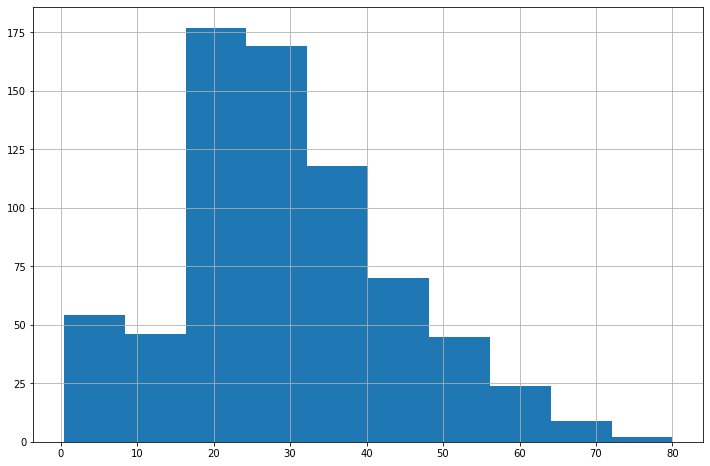

In [55]:
data.Age.hist();  # гистограмма распределения возраста среди пассажиров

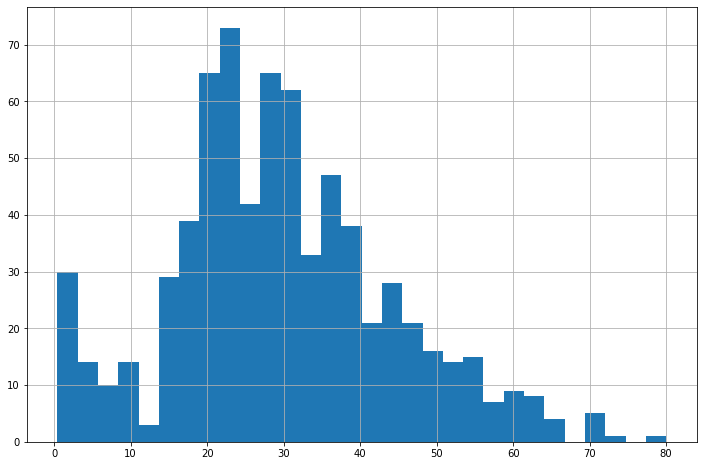

In [56]:
data.Age.hist(bins=30);  # увеличили кол-во столбцов (бинов)

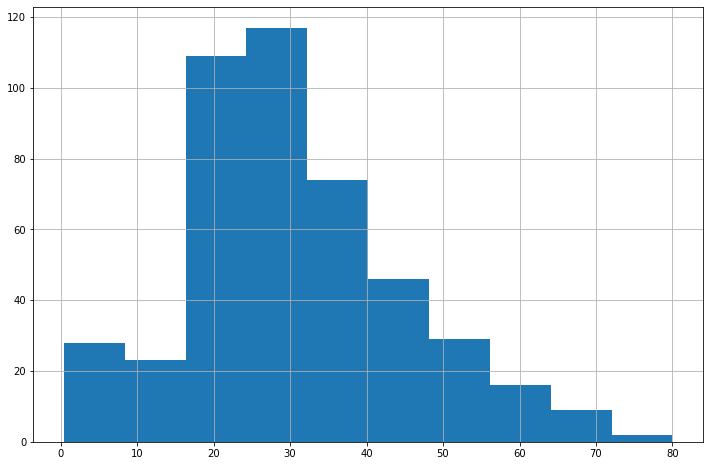

In [57]:
data[data.Sex == 'male'].Age.hist();  #гистограмма распределения возраста среди мужчин

Задание: постройте гистограмму для распределения стоимости билетов (Fare).

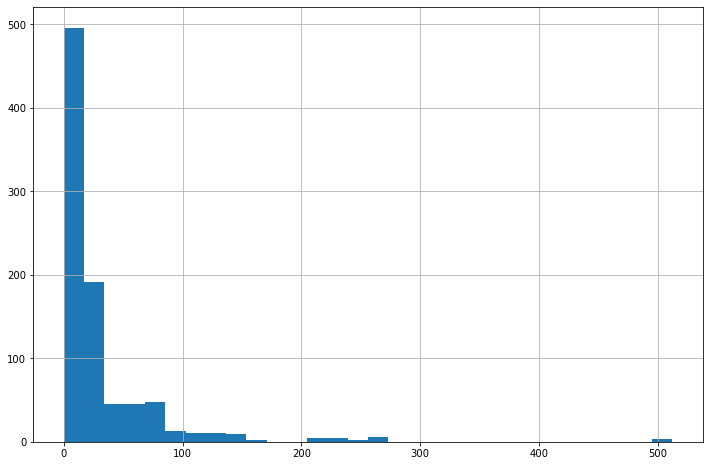

In [58]:
data.Fare.hist(bins=30);

Задание: сранивте гистограммы распределения стоимости билетов для разных классов (Pclass).

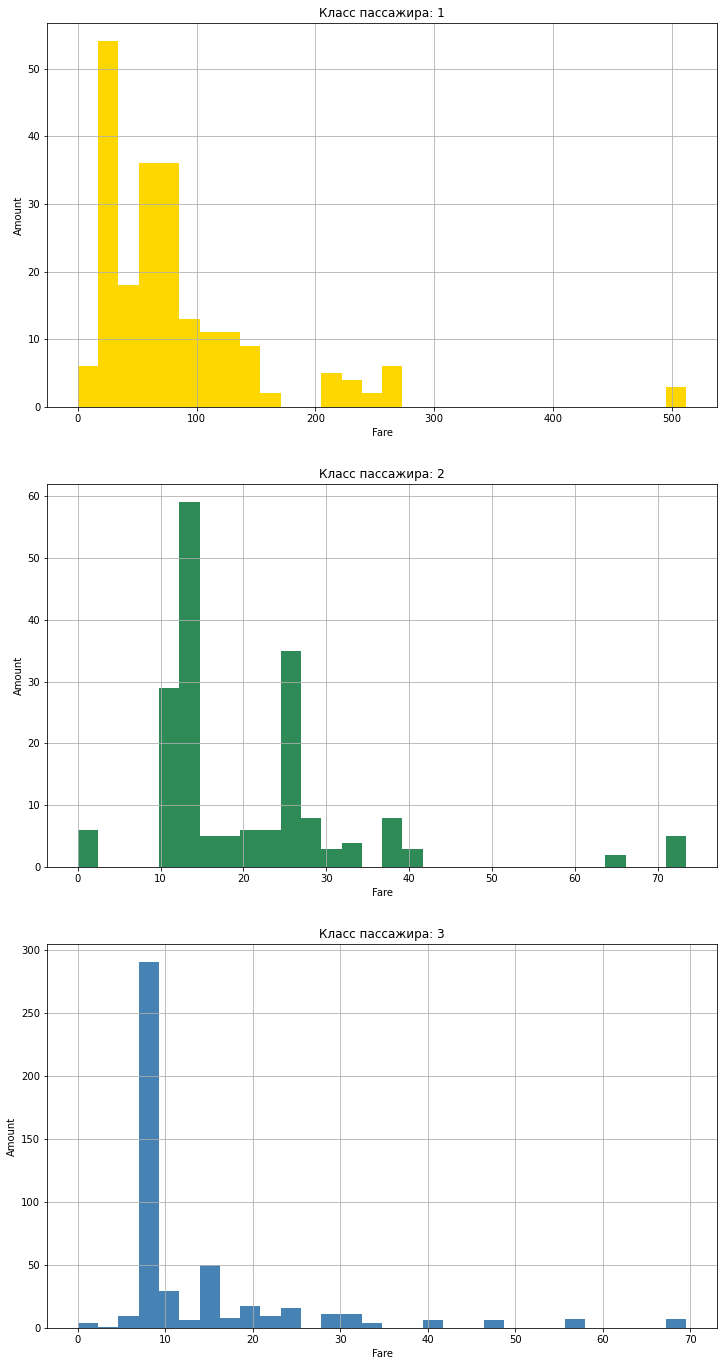

In [59]:
import itertools

import numpy as np

pclasses = np.sort(data.Pclass.unique())
_, axes = plt.subplots(len(pclasses), 1, figsize=(12, 8 * len(pclasses)))
axes = axes.ravel()

for pclass, ax, color in zip(pclasses, axes, itertools.cycle(['gold', 'seagreen', 'steelblue'])):
    ax.hist(data[data.Pclass == pclass].Fare, bins=30, color=color)
    ax.set_title(f"Класс пассажира: {pclass}")
    ax.set_xlabel('Fare')
    ax.set_ylabel('Amount')
    ax.grid(True)

plt.show();

Построим столбчатую диаграмму для признака "класс пассажира":

1) Сгруппируем все данные по признаку Pclass - data.groupby('Pclass') и посчитаем количество в каждой из групп - size()

In [60]:
data.groupby('Pclass').size() 

Pclass
1    216
2    184
3    491
dtype: int64

2) На полученных данных построим диаграмму:

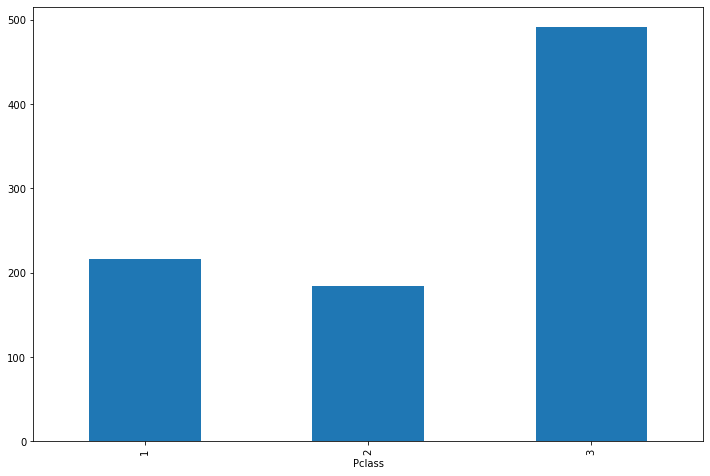

In [61]:
data.groupby('Pclass').size().plot(kind='bar');

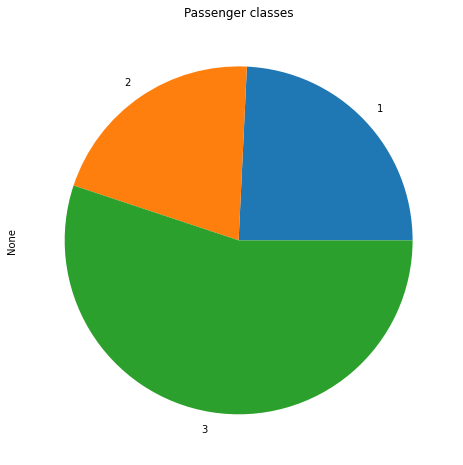

In [62]:
data.groupby('Pclass').size().plot(kind='pie', title='Passenger classes');

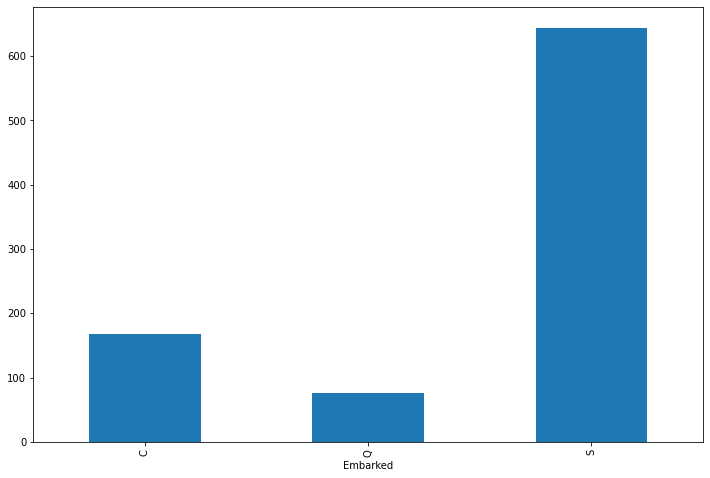

In [63]:
data.groupby('Embarked').size().plot(kind='bar');

Задание: постройте по гистограмме и круговой диаграмме для еще двух категориальных признаков.

Размер семьи.

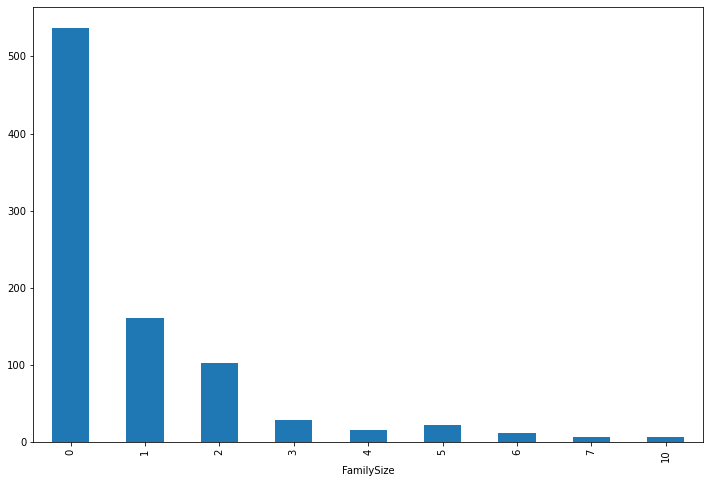

In [64]:
data.groupby('FamilySize').size().plot(kind='bar');

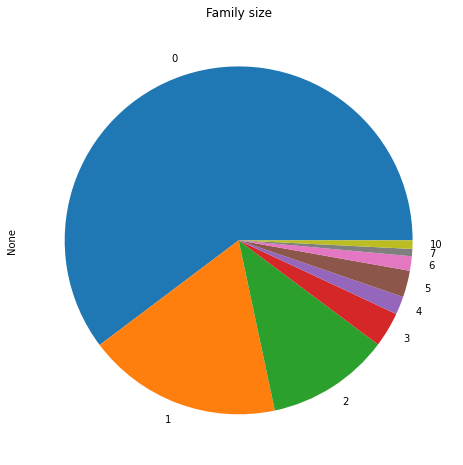

In [65]:
data.groupby('FamilySize').size().plot(kind='pie', title='Family size');

Палуба.

In [66]:
data['Deck'] = data['Cabin'].dropna().apply(lambda value: value[0])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,1,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,0,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1,Mr,NaN


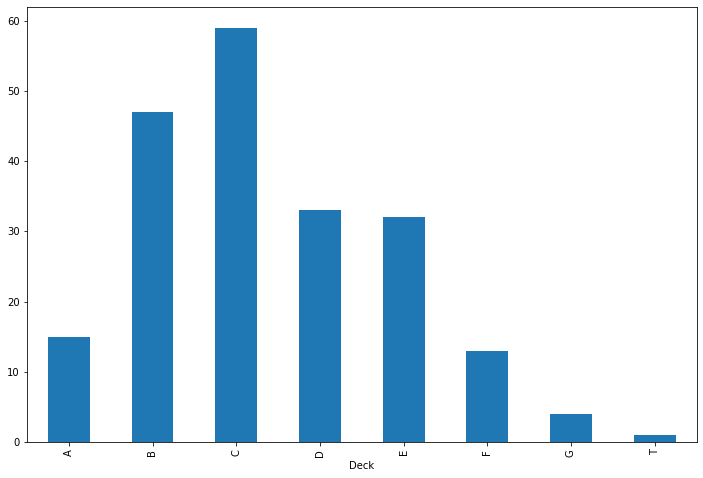

In [67]:
data.groupby('Deck').size().plot(kind='bar');

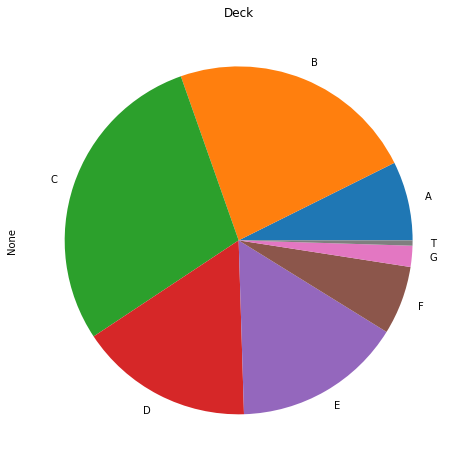

In [68]:
data.groupby('Deck').size().plot(kind='pie', title='Deck');

Можно делать и чуть более сложные графики. Давйте посмотрим на распределение выживших среди мужчин и женщин.

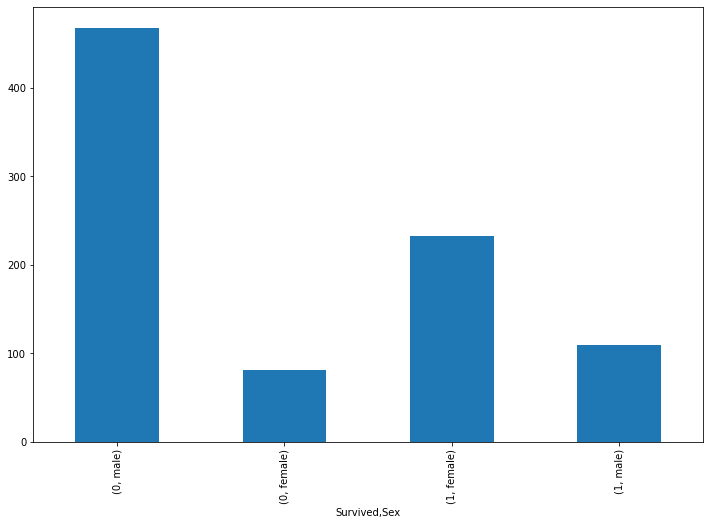

In [69]:
data.groupby(['Survived'])['Sex'].value_counts().plot(kind='bar');

Так мы видим разбивку, но хотелось бы получить составные столбики. Для этого выполним метод unstack(), который преобразует датафрейм.

In [70]:
data.groupby(['Survived'])['Sex'].value_counts() # без unstack

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [71]:
data.groupby(['Survived'])['Sex'].value_counts().unstack() # с unstack. Обратите внимание, как изменилась структура датафрема.

Sex,female,male
Survived,,
0,81,468
1,233,109


А вот его мы уже можем визуализировать. 

<AxesSubplot:xlabel='Survived'>

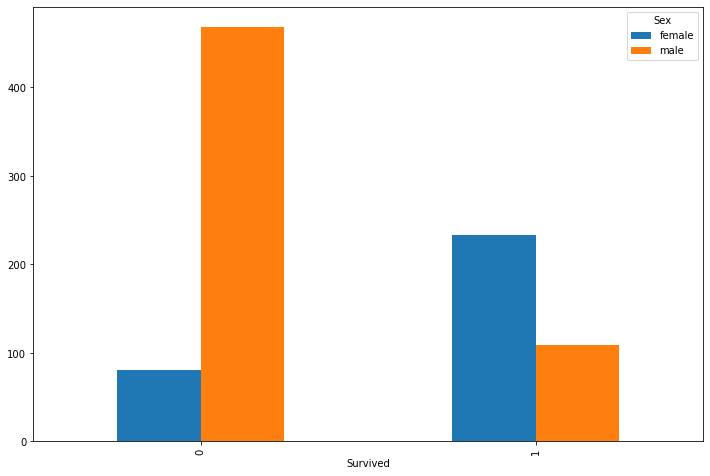

In [72]:
data.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind='bar')

Уже лучше. А еще можно добавить дополнительный параметр в метод plot() и станет совсем хорошо.

<AxesSubplot:xlabel='Survived'>

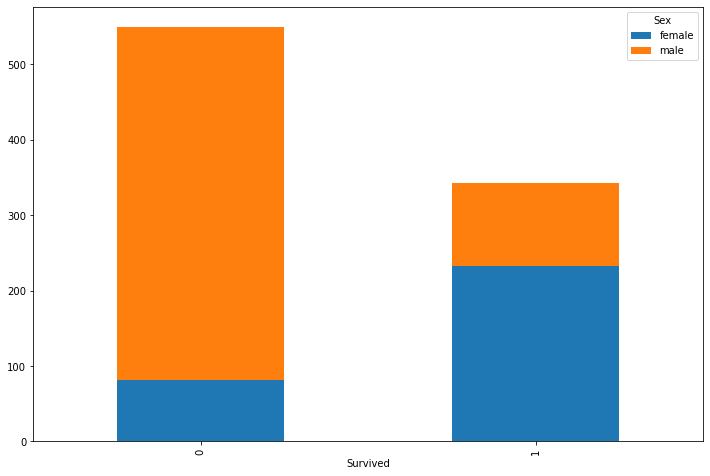

In [73]:
data.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind='bar', stacked=True)

Сохранение датафрейма:

In [74]:
data.to_csv(Path.home() / 'new_titanic.csv')

## Описательные статистики в Python


**Описательная статистика на Python: количественные и качественные данные**

Описательная статистика или дескриптивная статистика (*англ.* descriptive statistics) занимается обработкой эмпирических данных, их систематизацией, наглядным представлением в форме графиков и таблиц, а также их количественным описанием посредством  статистических показателей.

Для начала разберемся с несколькими важными определениями:

**Распределение**

Случайная величина — это переменная, значения которой представляют собой исходы какого-нибудь случайного феномена или эксперимента. Простыми словами: это численное выражение результата случайного события. Случайная величина является одним из основных понятий теории вероятностей.

Распределение вероятностей — это закон, описывающий область значений случайной величины и вероятности их исхода (появления).

Чтобы чуть лучше понять, что же такое распределение, давайте посмотрим на гистограмму признака "Age".

**Гистограмма**

Гистограмма представляет собой столбчатую диаграмму.

При построении гистограммы множество значений признака разбивается на $k$ интервалов,
эти интервалы становятся основаниями столбцов. Высоты стобцов пропорциональны количеству (частоте) значений признака, попадающих в 
соответствующий интервал.

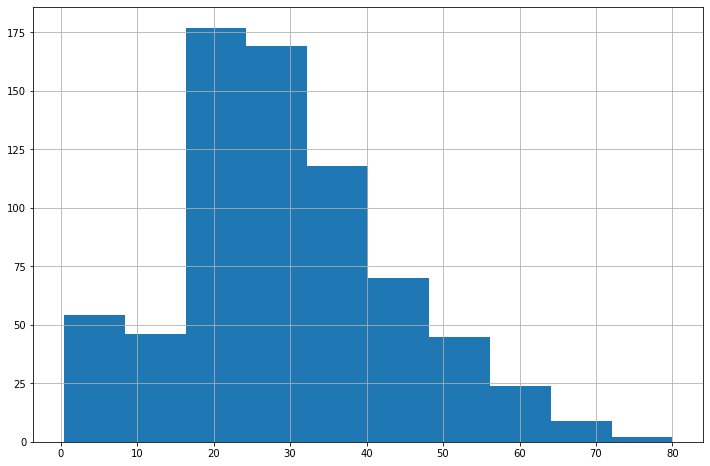

In [75]:
data.Age.hist();

Обычно, когда говорят о распределении, представляют сглаженную линию, под которой могли бы находиться все наши данные. Такой график уже показывает нам не сколько раз встречается каждое значение, а какую долю распределения такие значения составляют.
Давайте импортируем библиотеку для визуализаций seaborn (о ней поговорим подробнее в следующий раз), которая поможет нам построить такой график.

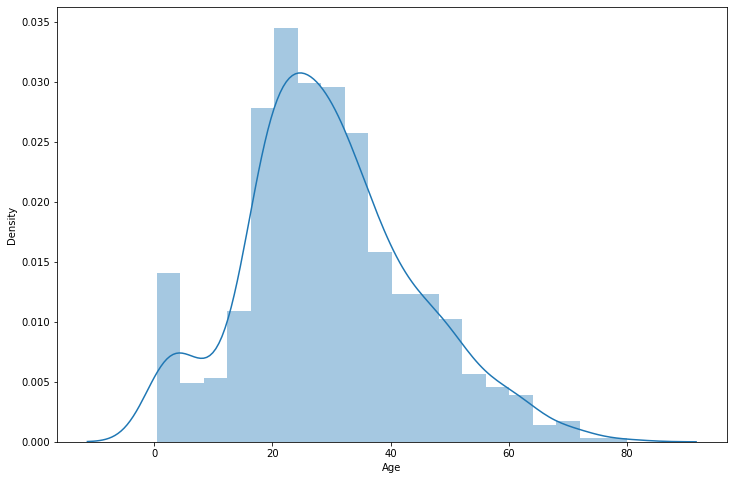

In [76]:
import seaborn as sns  # импортируем библиотеку под именем sns

sns.distplot(data.Age.dropna());  # применяем функцию, которая строит график распределения из библиотеки seaborn к нашим данным. 
                                  # методом .dropna() опускаем ячейки с пропущенными значениями - иначе seaborn сломается.

В идеальном мире многие вещи распределены нормально (например, вес и рост людей). Это значит, что такое распределение имеет определенные параметры (не будем их обсуждать в этом курсе) и выглядит как колокол (а вот это можно и запомнить). 

Для некоторых моделей в статистике мы можем применять только переменные, которые распределены нормально. Давайте посмотрим, как распределен возраст пассажиров относительно нормального распределения. Для этого импортируем функцию, которая задает нормальное распределение.

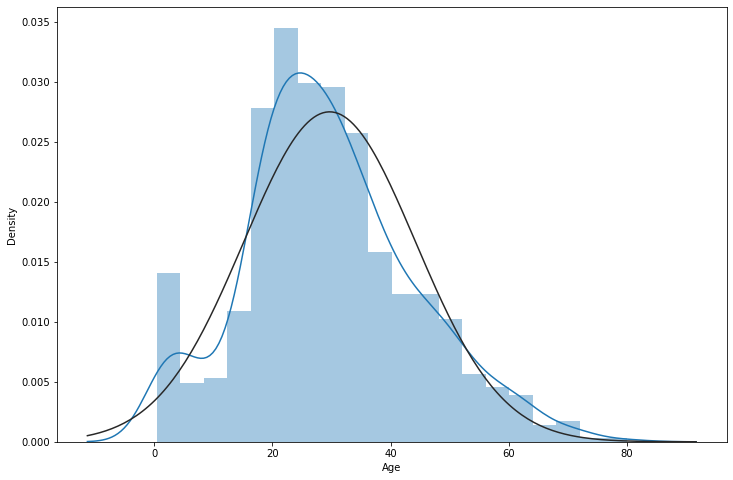

In [77]:
# из пакета для работы со статистическими данными и моделями импортируем команду, которая задает нормальное распределение
from scipy.stats import norm

sns.distplot(data.Age.dropna(), fit=norm);  # параметр fit строит нам еще один график поверх существующего, 
                                            # сейчас мы просим его построить нормальное распределение 

Как распределние возраста выглядит относительно нормального?

**Задание:** постройте распределение цены билетов, как он выглядит относительно нормального распределения?


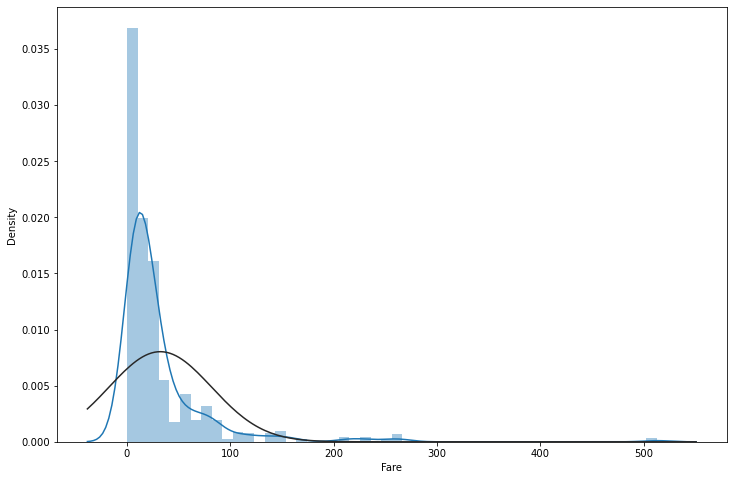

In [78]:
sns.distplot(data.Fare.dropna(), fit=norm);

**Максимальное и минимальное значения**

In [79]:
data.Age.min()

0.42

In [80]:
data.Age.max()

80.0

In [81]:
min_fare = data.Fare.min()
max_fare = data.Fare.max()

print(f"Минимальная стоимость билета на Титанике составляла {min_fare}, а максимальная - {max_fare}")

Минимальная стоимость билета на Титанике составляла 0.0, а максимальная - 512.3292


**Меры центральной тенденции**

Меры среднего уровня дают усредненную характеристику совокупности объектов по определенному признаку.

В зависимости от типа шкалы измерения применяются следующие меры среднего уровня:
- для количественных данных - среднее значение (арифметическое среднее), медиана, мода

- для категориальных:

   для порядковых данных - медиана, мода

   для номинальных данных - мода

На самом деле таких мер довольно много, например: взвешенное среднее — среднее значение, учитывающее весовые коэффициенты для каждого значения, гармоническое среднее — количество наблюдений, деленное на сумму инвертированных значений наблюдений, и так далее.

**Среднее значение (математическое ожидание)**

*Математическое ожидание* вычисляется по формуле:

$$
 {\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {1}{n}}(x_{1}+\ldots +x_{n})} 
 $$

In [82]:
data.Age.mean()

29.69911764705882

In [83]:
mean_fare = data.Fare.mean()
print(f"Средняя стоимость билета на Титанике составляла {mean_fare}")

Средняя стоимость билета на Титанике составляла 32.2042079685746


**Немного усложним задачу**

In [84]:
data[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


**Медиана**

Если $x_1, x_2, ..., x_n$ – упорядоченные по возрастанию или убыванию числовые значения рассматриваемого признака, 
$n$ – объем выборки, то *медиана* - это средний элемент для нечетного  $n$ и полуcумма средних элементов для четного  $n$.

Для порядковой шкалы медиана является такой точкой на шкале, которая делит всю совокупность опрошенных на две равных части — тех, кто отметил градации меньше этой точки (либо равные ей), и тех, кто отметил градации больше этой точки.

Вопрос знатокам: можно ли посчитать медиану для категориальных не порядковых данных? 🤔

In [85]:
data.Age.median()

28.0

In [86]:
median_fare = data.Fare.median()
print(f"Медиана стоимости билета на Титанике составляла {median_fare}")

Медиана стоимости билета на Титанике составляла 14.4542


**Мода**

Мода - значение во множестве наблюдений, которое встречается наиболее часто.

In [87]:
data.Pclass.mode()

0    3
dtype: int64

In [88]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Меры разброса**

Меры разброса показывают, насколько хорошо данные значения представляют совокупность. Как меры разброса применяются:

- дисперсия случайной величины и среднеквадратическое отклонение

- коэффициент вариации (это отношение среднеквадратического отклонения к среднему значению, выраженное в процентах, показывает однородность выборки)

- и так далее

**Дисперсия и среднеквадратическое отклонение**

*Дисперсия* значений признака является суммой квадратов отклонений этих значений от их среднего, деленной на число наблюдений:
$$
\sigma^2={\dfrac {\sum \limits _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)}{n}}^{2}
$$
*Среднеквадратическое отклонение*, *стандартное отклонение* или *стандартный разброс* - квадратный корень из дисперсии, равный $\sigma$

Стандартное отклонение измеряется в тех же единицах, что и сама случайная величина, а дисперсия измеряется в квадратах этой единицы измерения.

In [89]:
data[['Pclass', 'Age']].groupby('Pclass').std()

,Age
Pclass,
1,14.802856
2,14.001077
3,12.495398


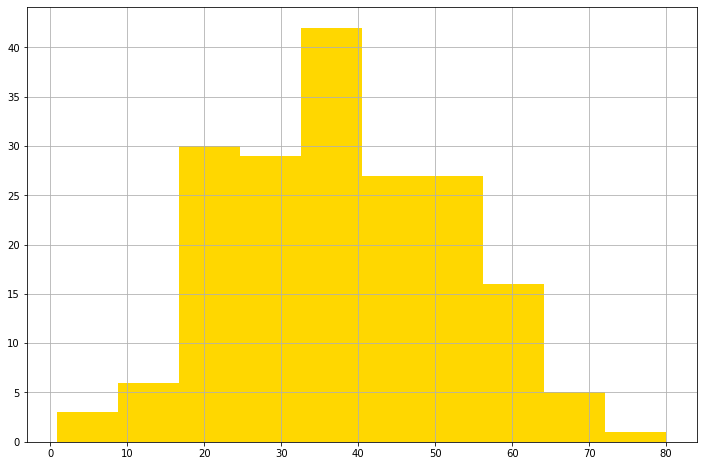

In [90]:
data[data.Pclass == 1].Age.hist(color='gold');

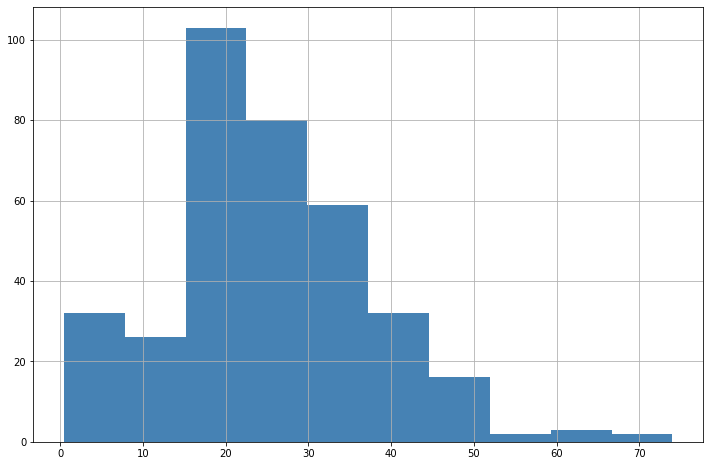

In [91]:
data[data.Pclass == 3].Age.hist(color='steelblue');

**Квантили**

Квантиль - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем.

Например, фраза «для развитых стран 99-процентиль продолжительности жизни составляет 100 лет» означает, что ожидается, что 99 % людей проживут не более, чем 100 лет.

Относительно нашего датасета фраза "75%-перцентиль возраста пассажиров Титаника равна 38 лет" означает, что 75% пассажиров были не старше 38 лет.

Вопросы знатокам:
- Как еще можно назвать 50%-перцентиль? 🤔
- Что значит фраза "75%-перцентиль стоимости билетов на Титаник была равна 31"? 🤔

In [92]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

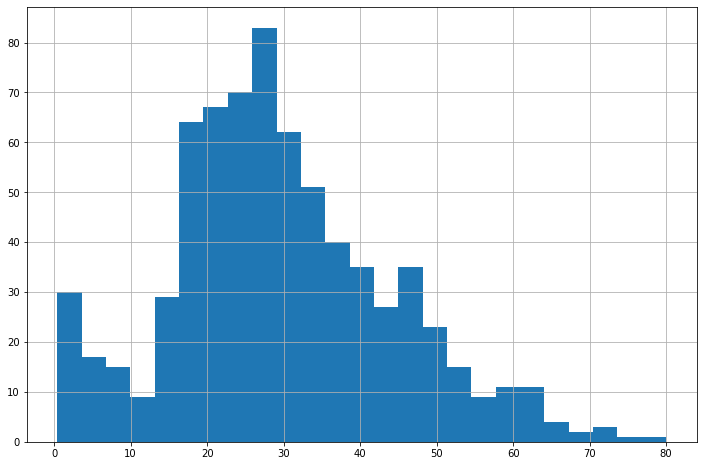

In [93]:
data.Age.hist(bins=25);

**Описание массива нечисловых данных**

В качестве базовой описательной статистики для категориальных признаков можно использовать следующий набор характеристик:

- количество уникальных представителей массива

- частоты встречаемости этих представителей

- наиболее часто встречающиеся представители (мода распределения)

- наиболее редко встречающиеся представители

In [94]:
data.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [95]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [96]:
data.Pclass.mode()

0    3
dtype: int64

**И все сразу**

In [97]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


## И еще чуть-чуть! Работа с пропущенными значениями.

Если вы помните, то переменная Age содержит пропущенные значения. Давайте посмотрим информацию об этой колонке.


In [98]:
data[['Age']].info()  # обратите внимание - двойные скобки. Так pandas нам вернет датафрейм из одной колонки, а не список.
                      # А метод info() работает только с датафреймом

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [99]:
type(data['Age'])  # вот так - объект подобный списку (Series)

pandas.core.series.Series

In [100]:
type(data[['Age']])  # а вот так - датафрейм

pandas.core.frame.DataFrame

Вернемся к info(). Мы видим, что из 891 наблюдения у нас только 714 ненулевых значений. Значит, у этих пассажиров возраст неизвестен. Ваши идеи, что можно с этим сделать?

Есть разные варианты того, что делать с пропущенными значениями - от "не делать ничего и выкинуть их" до "давайте предскажем их значения с помощью нейронки". Почитать можно здесь: 

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

Мы с вами попробуем сделать второй по сложности вариант (после не делать ничего) и заменить их средним значением (средним или медианой). Для категориальных данных можно заполнять пропущенные значения модой.

Пропущенные значения могут быть закодированы по-разному - 0, 'No response', '999'. В итоге мы их всегда хотим привести к объекту NaN (not a number), с которым могут работать методы pandas. В нашем датасете они уже нужного формата. В других случаях, нужно будет отфильтровать значения и привести их нужному виду.


In [101]:
print(data.loc[5, 'Age'])
print(type(data.loc[5, 'Age']))

nan
<class 'numpy.float64'>


In [102]:
data[data['Age'].isnull()].head() # выводим значения датафрейма, в которых отсутствует возраст
                                  # Они возращают True методу .isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title,Deck
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,0,1,Mr,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S,0,1,Mr,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,NaN,C,0,1,Mrs,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,NaN,C,0,1,Mr,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,NaN,Q,0,1,Miss,NaN


In [103]:
data['Age'].median() # вспомним какая у нас медиана

28.0

In [104]:
data['Age_Median'] = data['Age'].fillna(data['Age'].median())  # сохраняем результат заполнения в новую колонку

In [105]:
data[data['Age'].isnull()].head()  # смотрим, что произошло с возрастом в новой колонке у тех, у кого он отсутсвовал

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title,Deck,Age_Median
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,0,1,Mr,NaN,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S,0,1,Mr,NaN,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,NaN,C,0,1,Mrs,NaN,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,NaN,C,0,1,Mr,NaN,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,NaN,Q,0,1,Miss,NaN,28.0


In [106]:
data.head() # А у всех остальных - их нормальный возраст.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title,Deck,Age_Median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0,Mr,NaN,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0,Mrs,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,1,Miss,NaN,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,0,Mrs,C,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1,Mr,NaN,35.0


Такой метод один из самых топорных, но сойдет для первого знакомства или черновика анализа в серьезном исследовании. Давайте попробуем теперь немного улучшить его. Посмотрим, как отличается медианный возраст для мужчин и женщин.

In [107]:
data.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

Разница два года! Было бы логично в наших данных заполнять недостающие значения по полу.

In [108]:
data["Age_Median_Sex"] = data["Age"].fillna(data.groupby('Sex')["Age"].transform('median'))

In [109]:
data[data['Age'].isnull()].head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title,Deck,Age_Median,Age_Median_Sex
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,0,1,Mr,NaN,28.0,29.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S,0,1,Mr,NaN,28.0,29.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,NaN,C,0,1,Mrs,NaN,28.0,27.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,NaN,C,0,1,Mr,NaN,28.0,29.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,NaN,Q,0,1,Miss,NaN,28.0,27.0


In [110]:
data.head() # Опять проверяем, что это все применилось только к нужным людям

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title,Deck,Age_Median,Age_Median_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0,Mr,NaN,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0,Mrs,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,1,Miss,NaN,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,0,Mrs,C,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1,Mr,NaN,35.0,35.0


Разберем как работает предыдущий кусок кода

In [111]:
# эта функция возвращает нам колонку возраст, где все значения заменены медианой по условию пола
# data.groupby('Sex') - группирует наши значения по полу
# ['Age'] - колонка, с которой работаем
# transform('median') - высчитывает медианный возраст для каждого пола и подставляет ее вместо значения
data.groupby('Sex')['Age'].transform('median').head()

0    29.0
1    27.0
2    27.0
3    27.0
4    29.0
Name: Age, dtype: float64

In [112]:
# когда передаем это все как аргумент методу .fillna - заполнение по медиане работает только для отсутствующих значений.
data["Age"].fillna(data.groupby('Sex')["Age"].transform('median')).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

**Задание**  
Заполните осутствующие значения переменной возраст на основании титула.

In [113]:
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title,Deck,Age_Median,Age_Median_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0,Mr,NaN,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0,Mrs,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,1,Miss,NaN,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,0,Mrs,C,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1,Mr,NaN,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,8.4583,NaN,Q,0,1,Mr,NaN,28.0,29.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,0,1,Mr,E,54.0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,4,0,Master,NaN,2.0,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S,2,0,Mrs,NaN,27.0,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C,1,0,Mrs,NaN,14.0,14.0


**Заполнение по моде для категориальных переменных**

Тоже самое (почти!) работает и для категориальных переменных.

In [114]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Alone,Title,Deck,Age_Median,Age_Median_Sex
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN,0,1,Miss,B,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN,0,1,Mrs,B,62.0,62.0


Давайте посмотрим, что возвращает нам функция мода - не число, как например median или mean, а объект вроде списка. 

In [115]:
data['Embarked'].mode()

0    S
dtype: object

Чтобы передать ее результат методу fillna, нам нужно "вытащить" значение из него (а это мы умеем делать - оно лежит под нулевым индексом.


In [116]:
data['Embarked'].mode()[0]

'S'

In [117]:
# применяем
data["Embarked_Mode"] = data["Embarked"].fillna(data['Embarked'].mode()[0])

In [118]:
# проверяем
data.loc[61]

PassengerId                        62
Survived                            1
Pclass                              1
Name              Icard, Miss. Amelie
Sex                            female
Age                                38
SibSp                               0
Parch                               0
Fare                               80
Cabin                             B28
Embarked                          NaN
FamilySize                          0
Alone                               1
Title                            Miss
Deck                                B
Age_Median                         38
Age_Median_Sex                     38
Embarked_Mode                       S
Name: 61, dtype: object